In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("case1.xlsx")
df.shape

(40, 5)

In [2]:
df.head()

,Bulan,A,B,c,D
0,2019-03-01,2222.0,4326.0,3346.0,2187
1,2019-04-01,2328.0,4288.0,3233.0,2213
2,2019-05-01,2288.0,4312.0,NaN,3096
3,2019-06-01,2275.0,4442.0,2936.0,3841
4,2019-07-01,2322.0,4438.0,3322.0,3745


In [3]:
df.isna().sum()

Bulan    0
A        2
B        2
c        2
D        0
dtype: int64

In [4]:
# df.fillna(0, inplace=True) # mengganti dengan nilai 0

In [5]:
df.fillna(df.mean(), inplace=True) # Mengganti dengan nilai rata - rata 

In [6]:
# df['A'].interpolate(method='linear', inplace=True)
# df['B'].interpolate(method='linear', inplace=True)
# df['c'].interpolate(method='linear', inplace=True)

Interpolasi linear adalah metode yang digunakan untuk mengisi nilai-nilai yang hilang atau tidak ada dalam data dengan mengestimasi nilai-nilai di antara dua titik data yang diketahui dengan garis lurus.

In [7]:
df.isna().sum()

Bulan    0
A        0
B        0
c        0
D        0
dtype: int64

In [8]:
df.head()

,Bulan,A,B,c,D
0,2019-03-01,2222.0,4326.0,3346.000000,2187
1,2019-04-01,2328.0,4288.0,3233.000000,2213
2,2019-05-01,2288.0,4312.0,8282.710526,3096
3,2019-06-01,2275.0,4442.0,2936.000000,3841
4,2019-07-01,2322.0,4438.0,3322.000000,3745


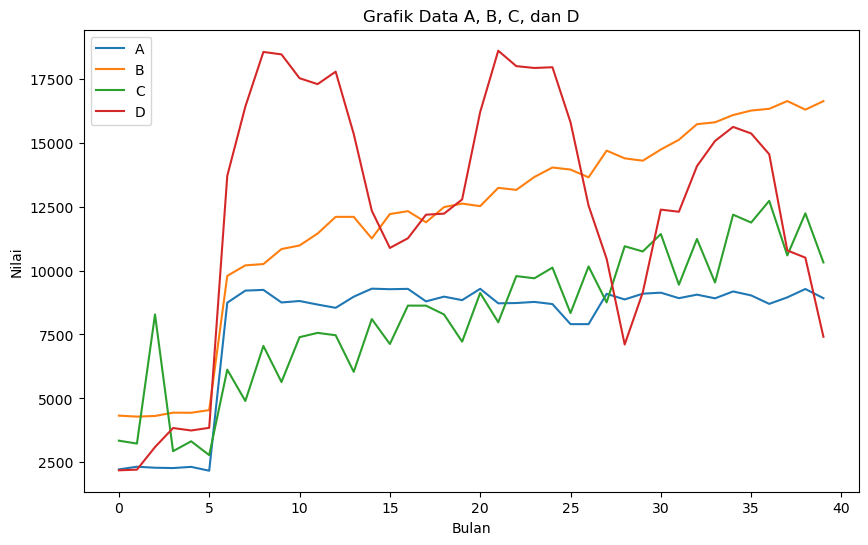

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['A'], label='A')
plt.plot(df.index, df['B'], label='B')
plt.plot(df.index, df['c'], label='C')
plt.plot(df.index, df['D'], label='D')

# Menambahkan label dan judul
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.title('Grafik Data A, B, C, dan D')

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# ARIMA --> Autoregressive Integrated Moving Average
# SARIMA -->Seasonal Autoregressive Integrated Moving Average

# ARIMAX-> ARIMA with Exogenous Variables
#SARIMAX-->SARIMA with Exogenous Variables

In [11]:
#Training -> bulan Februari 2019-03-01 - Desember 2021-06-01
train = df.iloc[:-12]
#Testing -> Januari 2021-07-01 - Oktober 2022-06-01 [12 Data]
test = df.iloc[-12:]

In [12]:
test

,Bulan,A,B,c,D
28,2021-07-01,8870.0,14389.0,10951.0,7109
29,2021-08-01,9096.0,14297.0,10747.0,9145
30,2021-09-01,9135.0,14735.0,11430.0,12384
31,2021-10-01,8920.0,15116.0,9448.0,12300
32,2021-11-01,9058.0,15726.0,11235.0,14085
33,2021-12-01,8914.0,15799.0,9532.0,15069
34,2022-01-01,9183.0,16084.0,12186.0,15619
35,2022-02-01,9028.0,16259.0,11878.0,15363
36,2022-03-01,8697.0,16327.0,12728.0,14550
37,2022-04-01,8952.0,16630.0,10594.0,10788


In [13]:
# Grid Search
import itertools # Library untuk iterasi
p = d = q = range(0,3)
pdq = list(itertools.product(p, d, q)) # Membuat semua kombinasi yang berbeda

# Akaike Information Criterion : evaluasi model statistical dari sebuah dataset,
#untuk menentukan model terbaik dari kombinasi parameternya
aic = float("inf")

for parameter in pdq:
  try:
      model = SARIMAX(train["A"],
                      exog = train[["B",
                                    "c",
                                    "D"]],
                      order = parameter,
                      seasonal_order = (0,0,0,0))

      results = model.fit()

      if results.aic < aic:
          aic = results.aic
          best_order = parameter

  except:
      continue

print("Best ARIMAX parameters : order = {}".format(best_order))

C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarni

Best ARIMAX parameters : order = (0, 2, 1)


C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
model_arimax = SARIMAX(train['A'], # Misalkan kita mau prediksi kolom A, dengan menggunakan kolom B,c,d sebagai features bisa diganti sesuai kebutuhan
                        exog = train[["B","c","D"]],
                        order = (0,2,1), # --> untuk parameter order dicari yang paling optimal dengan grid search
                        seasonal_order = (0, 0, 0, 0)) # --> akan menjadi format ARIMAX

In [15]:
results_arimax = model_arimax.fit()

In [16]:
# Define the number of periods (1 year) to forecast into the future
forecast_periods = 12  # Assuming monthly data

In [17]:
start = len(train)
end = len(train) + len(test) - 1

predictions_arimax = results_arimax.predict(start = start,
                                              end = end,
                                              exog = test[["B",
                                                           "c",
                                                           "D"]])

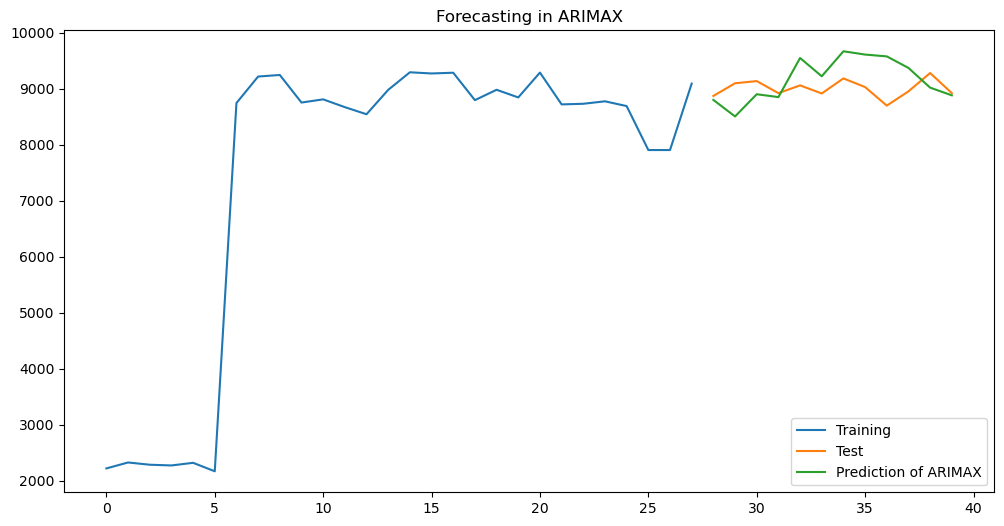

In [18]:
# Plot SARIMAX
plt.figure(figsize=(12, 6))
plt.plot(train["A"], label = "Training")
plt.plot(test["A"], label = "Test")
plt.plot(test.index, predictions_arimax, label = "Prediction of ARIMAX")
plt.legend()
plt.title("Forecasting in ARIMAX")
plt.show()

In [19]:
def calculate_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

def calculate_mape(actual, predicted):
    return 100 * np.mean(np.abs((actual - predicted) / actual))

def calculate_mad(data):
    return np.mean(np.abs(data - np.mean(data)))

In [20]:
calculate_mae(test["A"], predictions_arimax)

368.79609873269345

In [21]:
calculate_mape(test["A"], predictions_arimax)

4.103006777701345

In [22]:
calculate_mad(test["A"])

125.5

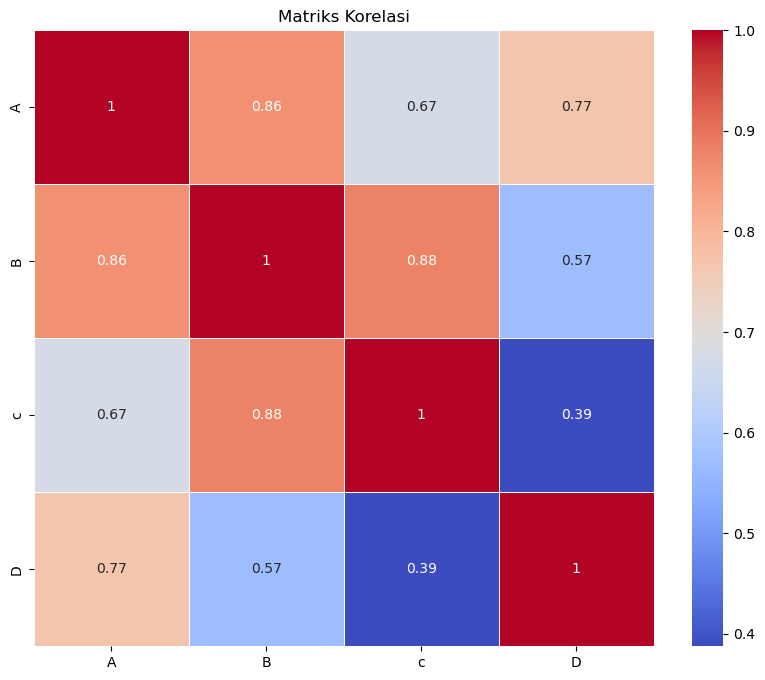

In [23]:
import seaborn as sns
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()